# Introduction

Quality assessment is an essential step in the wine making process as it helps ensure consistency and consumer satisfaction. The quality of wine has historically been evaluated by wine makers and sommeliers, who leverage their training and expertise to determine if a product meets acceptable standards (1). While there have been advancements in the detection of the physicochemical properties of wine and how they relate to flavour (2), quality assessment remains a subjective metric. 

Here we ask if wine quality can be predicted using machine learning. Our focus is to create an interpretable linear regression model trained on physicochemical wine data to perform this task. The utility of such a model is two-fold as it can be used as a tool to help less experienced wine makers and sommeliers get a sense of the quality of a given wine. Furthermore, the model would help to provide a more objective framework for wine assessment through interpretation of its coefficients. To achieve this, we will train our model on data related to vinho verde white wines from the Minho region of Portugal which contains the physicochemical and sensory data of 4898 wines (3).

In [1]:
import pandas as pd
import altair_ally as aly
import altair as alt
import matplotlib.pyplot as plt

In [2]:
aly.alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# loading in the dataset
origin_df = pd.read_csv('data/winequality-white.csv', sep=';', encoding='utf-8')

In [4]:
aly.corr(origin_df)

c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\mini

alt.ConcatChart(...)

In [5]:
# looking at the data
origin_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

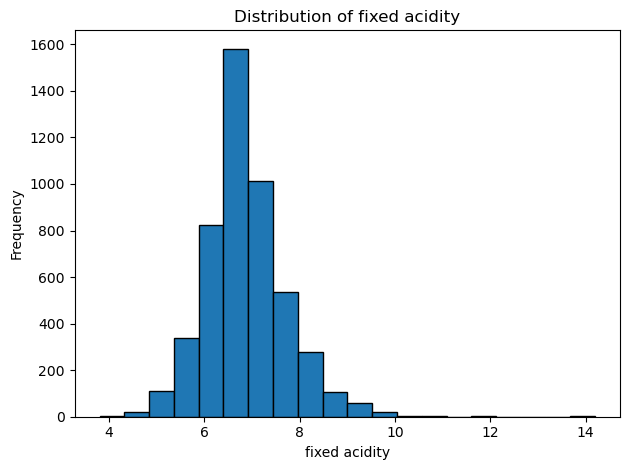

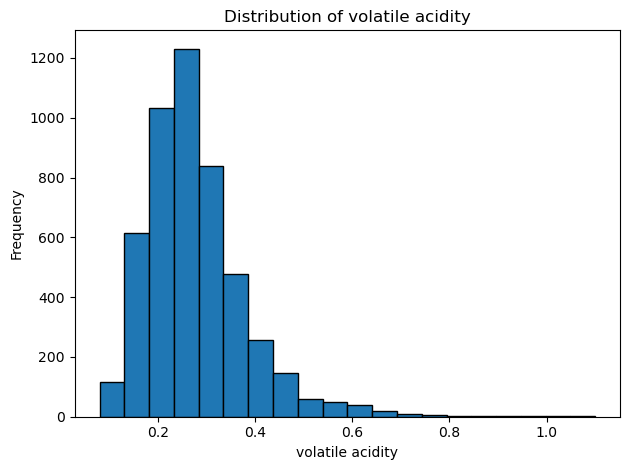

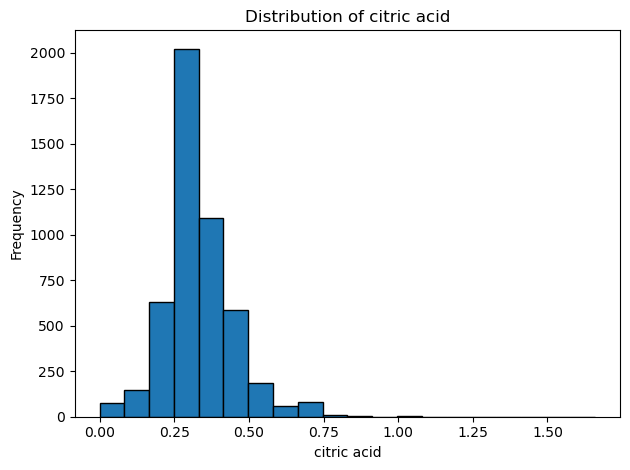

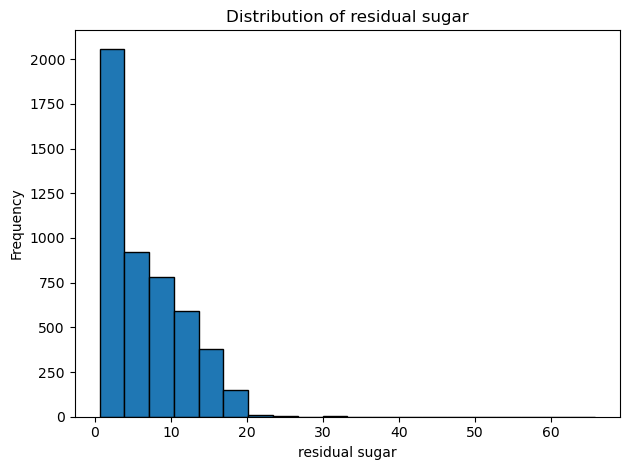

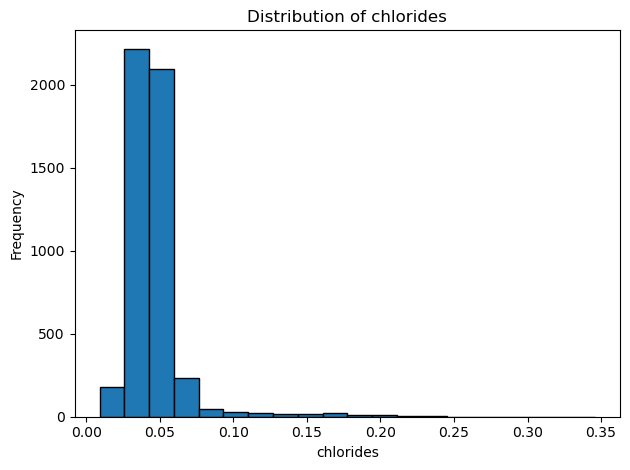

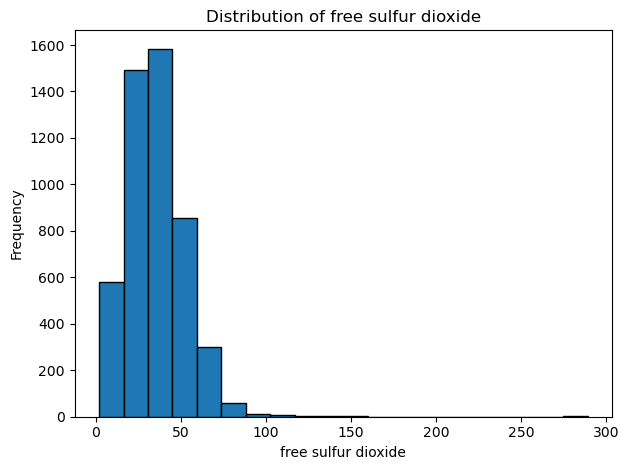

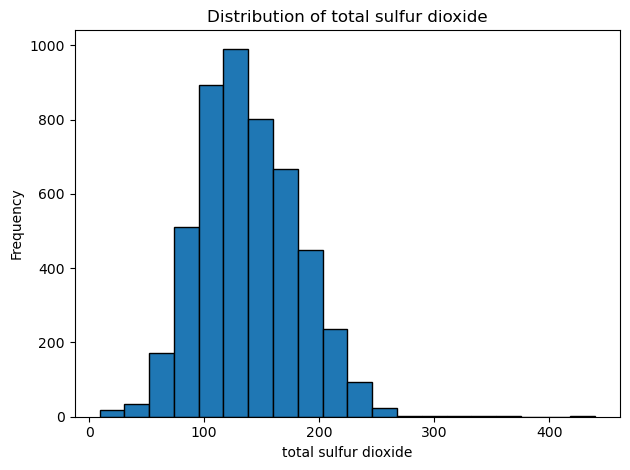

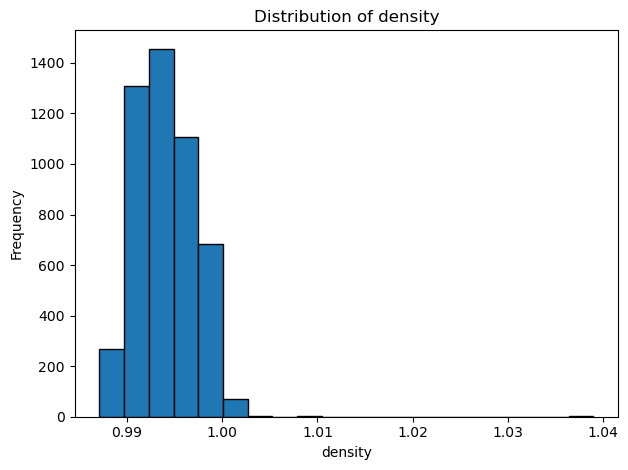

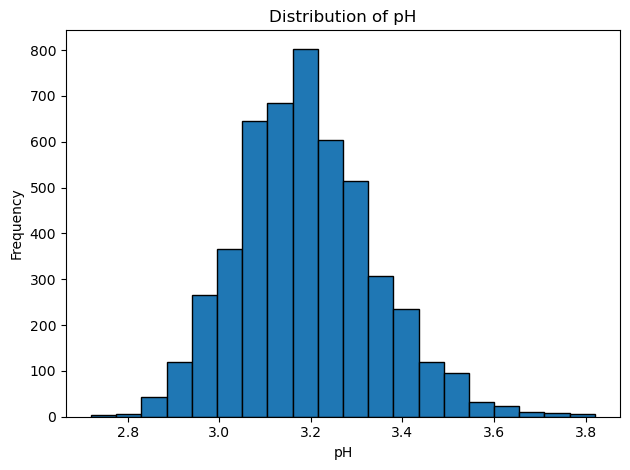

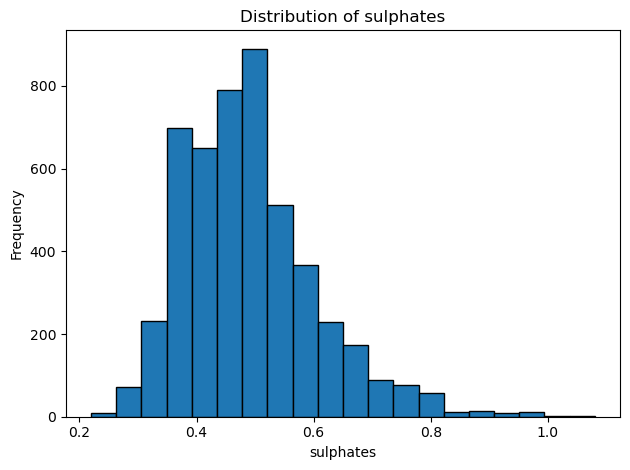

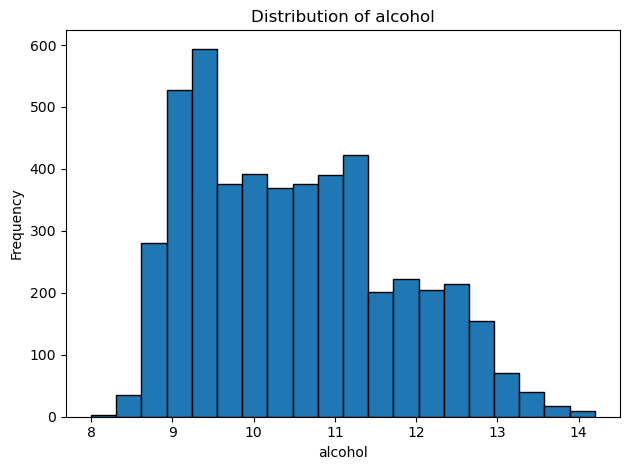

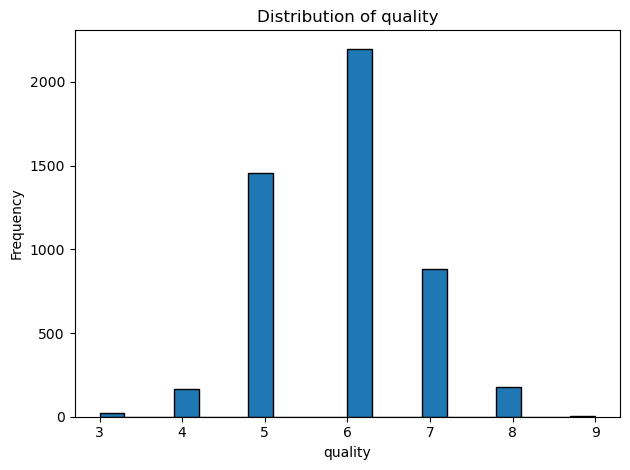

In [6]:
# plotting a bar graph for each variable
for feat in origin_df.columns.tolist():
    plt.hist(origin_df[feat], bins = 20, edgecolor='black')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feat}')
    plt.tight_layout()
    plt.show()



In [7]:
aly.corr(origin_df)

c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\mini

alt.ConcatChart(...)

In [8]:
# pairwise plots
aly.pair(origin_df.sample(300))

c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\miniforge3\envs\dsci573\Lib\site-packages\altair\utils\data.py:71: UserWarning: You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?
  return _is_pandas_dataframe(obj) or isinstance(
c:\Users\7luck\mini

alt.VConcatChart(...)

# References
1.	Langstaff SA. Sensory quality control in the wine industry. In: Sensory Analysis for Food and Beverage Quality Control. Woodhead Publishing; 2010. p. 236–61. <https://doi.org/10.1533/9781845699512.3.236>

2.	Polášková P, Herszage J, Ebeler S. Wine flavor: chemistry in a glass. Chemical Soc Rev. 2008 Aug 12;37(11):2478–89. <https://doi.org/10.1039/b714455p>

3.	Cortez P, Cerdeira A, Almeida F, Matos T, Reis J. Modeling wine preferences by data mining from physicochemical properties. Decis Support Syst. 2009 Nov;47(4):547–53. <https://doi.org/10.1016/j.dss.2009.05.016> 